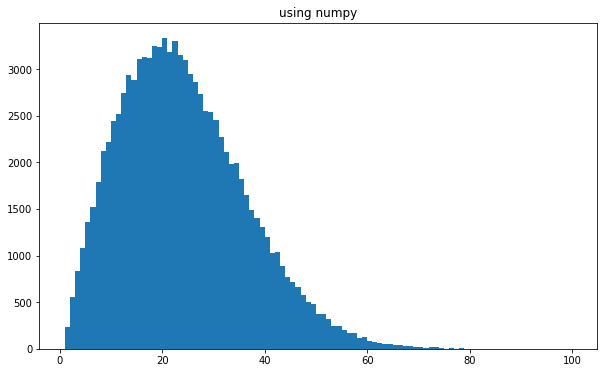

Couple first most likely values: [20 22 18 19 21 23 16 17 15 24]
Average value using numpy: 23.58438
CPU times: user 676 ms, sys: 35.5 ms, total: 712 ms
Wall time: 559 ms


In [4]:
%%time
# 3.12.2021
# Wojciech Kuzebski wk429552
#    RPiS Laboratorium
# Zadanie zaliczeniowe 1 - 2b

import numpy as np
import matplotlib.pyplot as plt

N = 100_000
M = 30 * N

stats = np.loadtxt('us_births_69_88.csv', skiprows=1, delimiter=',', dtype=int)

def emp_dates(samples, n):
    s = set()
    dates = []
    size = 0
    k = 0
    for day in samples:
        if day in s:
            dates.append(k)
            k = 0
            size += 1
            if size == n:
                break
            s.clear()
        else:
            k += 1
            s.add(day)
    return dates


counts = stats[:, 2]
days = np.random.randint(0, counts.shape[0] - 1, size=M)
ks = np.random.randint(1, np.max(counts), size=M)
sample = days[np.where(ks <= counts[days])]
emp_sample = emp_dates(sample, N)

assert len(emp_sample) == N

plt.figure(figsize=(10, 6))
plt.title('using numpy')
plt.hist(emp_sample, bins=range(1, 101))
plt.show()

# calcultating most probable values using numpy
vals, counts = np.unique(emp_sample, return_counts=True)
k_counts_numpy = vals[np.argsort(counts)][::-1]

print('Couple first most likely values: {}'.format(k_counts_numpy[:10]))
print('Average value using numpy: {}'.format(np.mean(emp_sample)))